In [23]:
import gymnasium as gym
from pogema import GridConfig
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

%load_ext autoreload
%autoreload 2
%matplotlib inline

%load_ext tensorboard

grid_config = GridConfig(
    size=8,
    density=0.3,
    num_agents=1,
    max_episode_steps=30,
    seed = 42
)

env = gym.make("Pogema-v0",grid_config=grid_config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### DQN

Sources: 

* https://github.com/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/dqn_sb3.ipynb
* https://github.com/araffin/rl-tutorial-jnrr19/blob/sb3/1_getting_started.ipynb

In [2]:
dqn_model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    seed=42,
    tensorboard_log="./dqn_tensorboard/"
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [3]:
# Evaluate untrained agent using separate env

val_env = gym.make("Pogema-v0",grid_config=grid_config)

val_dqn_model = DQN(
    "MlpPolicy",
    val_env,
    verbose=1,
    seed=42
)

mean_reward, std_reward = evaluate_policy(
    val_dqn_model,
    val_dqn_model.get_env(),
    deterministic=True,
    n_eval_episodes=20,
)

print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
mean_reward: 0.00 +/- 0.00


In [4]:
# Train agent and save it
dqn_model.learn(20000, log_interval=1000)
dqn_model.save("saved/dqn_baseline")

Logging to ./dqn_tensorboard/DQN_1


### Load trained agent and evaluate it

In [19]:
dqn_model = DQN.load("saved/dqn_baseline")

env.reset()

mean_reward, std_reward = evaluate_policy(dqn_model, env, deterministic=True, n_eval_episodes=20)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:0.00 +/- 0.00


/Users/aditya/miniconda3/envs/pogema/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


### Video Recording

In [22]:
from IPython.display import SVG, display
from pogema.animation import AnimationMonitor, AnimationConfig

env = AnimationMonitor(env)

def evaluate_success_rate(model, env, num_episodes=10):
    success_count = 0
    step_array = []
    for i in range(num_episodes):
        obs = env.reset()

        # Check if observation is a tuple and extract the first element if true.
        if isinstance(obs, tuple):
            obs = obs[0]
        max_step = 100
        steps_taken = 0
        done = truncated = False
        while not done and max_step > 0:
            action, _ = model.predict(obs)
            next_obs, reward, done, truncated, info = env.step(action)
            print(action,max_step,success_count,done)
            max_step -= 1
            steps_taken += 1
            # Check if next_obs is a tuple and extract the first element if true.
            if isinstance(next_obs, tuple):
                next_obs = next_obs[0]
            obs = next_obs

            # Check if agent was successful in that episode.
            if done:
                success_count += 1
                step_array.append(steps_taken)
                env.save_animation(f"render{i}.svg", AnimationConfig(egocentric_idx=0))
                break

    success_rate = success_count / num_episodes
    return success_rate, step_array

success_rate,step_array = evaluate_success_rate(dqn_model, env)
print(f"Agent Success Rate: {success_rate * 100:.2f}%")
print(f"steps to termination : {step_array}")

3 100 0 False
3 99 0 False
3 98 0 False
3 97 0 False
3 96 0 False
3 95 0 False
3 94 0 False
3 93 0 False
3 92 0 False
3 91 0 False
1 90 0 False
3 89 0 False
3 88 0 False
3 87 0 False
3 86 0 False
3 85 0 False
3 84 0 False
3 83 0 False
3 82 0 False
3 81 0 False
3 80 0 False
3 79 0 False
3 78 0 False
3 77 0 False
3 76 0 False
3 75 0 False
3 74 0 False
3 73 0 False
3 72 0 False
3 71 0 False
3 70 0 False
3 69 0 False
3 68 0 False
3 67 0 False
3 66 0 False
3 65 0 False
3 64 0 False
3 63 0 False
3 62 0 False
3 61 0 False
3 60 0 False
3 59 0 False
3 58 0 False
3 57 0 False
3 56 0 False
3 55 0 False
3 54 0 False
3 53 0 False
3 52 0 False
3 51 0 False
3 50 0 False
3 49 0 False
3 48 0 False
3 47 0 False
3 46 0 False
3 45 0 False
3 44 0 False
4 43 0 False
3 42 0 False
3 41 0 False
3 40 0 False
3 39 0 False
3 38 0 False
3 37 0 False
3 36 0 False
3 35 0 False
3 34 0 False
3 33 0 False
3 32 0 False
3 31 0 False
3 30 0 False
3 29 0 False
3 28 0 False
3 27 0 False
3 26 0 False
3 25 0 False
3 24 0 Fals

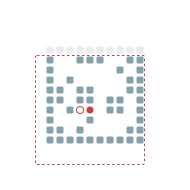

In [14]:
display(SVG('render8.svg'))

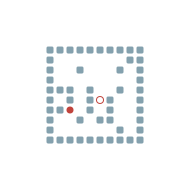

In [20]:
display(SVG('renders/pogema-ep00151.svg'))